In [1]:
#Import Packages

import csv 
import numpy as np
import pandas as pd
import string as stringmodule
import lemmy
import collections
from unicodedata import normalize
import re
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [2]:
def lemmatize_strings(body_text, language = 'da'):
    """Function to lemmatize a string or a list of strings, i.e. remove prefixes. Also removes punctuations.
    
    -- body_text: string or list of strings
    -- language: language of the passed string(s), e.g. 'en', 'da' etc.
    """
    
    if isinstance(body_text, str):
        body_text = [body_text] #Convert whatever passed to a list to support passing of single string
    
    if not hasattr(body_text, '__iter__'):
        raise TypeError('Passed argument should be a sequence.')
    
    lemmatizer = lemmy.load(language) #load lemmatizing dictionary
    
    lemma_list = [] #list to store each lemmatized string 

    word_regex = re.compile('[a-zA-Z0-9æøåÆØÅ]+') #All charachters and digits i.e. all possible words

    for string in body_text:
        #remove punctuation and split words
        matches = word_regex.findall(string)

        #split words and lowercase them unless they are all caps
        lemmatized_string = [word.lower() if not word.isupper() else word for word in matches]

        #lemmatize each word and choose the shortest word of suggested lemmatizations
        lemmatized_string = [min(lemmatizer.lemmatize('', word), key=len) for word in lemmatized_string]

        lemma_list.append(' '.join(lemmatized_string))

    return lemma_list if len(lemma_list) > 1 else lemma_list[0] #return list if list was passed, else return string

In [3]:
article_data = pd.read_csv('./dr_frequent_articles.csv', header = 0)

In [4]:
string = lemmatize_strings(' '.join(article_data['Text']).split(' '))


**Refugee Modifiers**

In [5]:
dictionary = ['flygtning']
flygtningmodifier = []
for word in dictionary:
    stop = False
    while not stop:
        try:
            idx = string.index(word)
            flygtningmodifier.append(tuple(string[idx-1:idx]))
            string = string[idx+1:]
        except:
            stop = True
            
            
flygtningmodifier

[('med',),
 ('af',),
 ('af',),
 ('afrikansk',),
 ('pak',),
 ('afrikansk',),
 ('300',),
 ('med',),
 ('af',),
 ('hjælpe',),
 ('som',),
 ('illegal',),
 ('15 000',),
 ('hundred',),
 ('nordafrikansk',),
 ('at',),
 ('af',),
 ('6700',),
 ('15 000',),
 ('afvise',),
 ('til',),
 ('mange',),
 ('modsat',),
 ('se',),
 ('at',),
 ('flest',),
 ('en',),
 ('få',),
 ('holde',),
 ('af',),
 ('blive',),
 ('af',),
 ('europa',),
 ('af',),
 ('flere',),
 ('være',),
 ('500',),
 ('for',),
 ('strømme',),
 ('flere',),
 ('5 000',),
 ('som',),
 ('at',),
 ('ville',),
 ('500',),
 ('for',),
 ('bosnisk',),
 ('million',),
 ('båd',),
 ('af',),
 ('flest',),
 ('om',),
 ('at',),
 ('syrisk',),
 ('af',),
 ('syrisk',),
 ('syrisk',),
 ('syrisk',),
 ('syrisk',),
 ('med',),
 ('af',),
 ('sige',),
 ('flere',),
 ('afghansk',),
 ('en',),
 ('afghansk',),
 ('afghansk',),
 ('illegal',),
 ('afghansk',),
 ('en',),
 ('afghansk',),
 ('afghansk',),
 ('illegal',),
 ('afghansk',),
 ('en',),
 ('en',),
 ('afghansk',),
 ('illegal',),
 ('afghansk',)

**Remove Stopwords from modifier list**

In [6]:
flygtningmodifier
def remove_stopwords(lst):
    with open('./stopord.txt', 'r') as sw:
        stopwords = sw.read().split('\n')
        #read the stopwords file 
        return [word for word in lst if not word in stopwords]

flygtningmodifier = [tuple(remove_stopwords(lst)) for lst in flygtningmodifier]
flygtningmodifier

[(),
 (),
 (),
 ('afrikansk',),
 ('pak',),
 ('afrikansk',),
 ('300',),
 (),
 (),
 ('hjælpe',),
 (),
 ('illegal',),
 ('15 000',),
 ('hundred',),
 ('nordafrikansk',),
 (),
 (),
 ('6700',),
 ('15 000',),
 ('afvise',),
 (),
 (),
 ('modsat',),
 (),
 (),
 (),
 (),
 (),
 ('holde',),
 (),
 (),
 (),
 ('europa',),
 (),
 (),
 (),
 ('500',),
 (),
 ('strømme',),
 (),
 ('5 000',),
 (),
 (),
 (),
 ('500',),
 (),
 ('bosnisk',),
 ('million',),
 ('båd',),
 (),
 (),
 (),
 (),
 ('syrisk',),
 (),
 ('syrisk',),
 ('syrisk',),
 ('syrisk',),
 ('syrisk',),
 (),
 (),
 (),
 (),
 ('afghansk',),
 (),
 ('afghansk',),
 ('afghansk',),
 ('illegal',),
 ('afghansk',),
 (),
 ('afghansk',),
 ('afghansk',),
 ('illegal',),
 ('afghansk',),
 (),
 (),
 ('afghansk',),
 ('illegal',),
 ('afghansk',),
 (),
 ('illegal',),
 ('danmark',),
 ('sende',),
 ('20',),
 ('give',),
 (),
 ('syrisk',),
 (),
 ('syrisk',),
 ('rigtig',),
 (),
 ('afghansk',),
 ('finde',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('tusind',),
 (),
 ('syrisk',),
 ('bosnisk

**Modifier Frequency**

In [7]:
flygtningmodifier_count = collections.Counter(flygtningmodifier).most_common(100)
flygtningmodifier_count


[((), 7701),
 (('syrisk',), 644),
 (('antal',), 159),
 (('hjælpe',), 144),
 (('million',), 139),
 (('al',), 88),
 (('sende',), 86),
 (('nyankomme',), 60),
 (('nå',), 57),
 (('modtage',), 56),
 (('hus',), 52),
 (('',), 47),
 (('give',), 45),
 (('enkelt',), 45),
 (('nytilkommen',), 45),
 (('afrikansk',), 43),
 (('tusind',), 40),
 (('160 000',), 40),
 (('somalisk',), 39),
 (('verden',), 39),
 (('gruppe',), 39),
 (('palæstinensisk',), 39),
 (('12 000',), 38),
 (('integrere',), 36),
 (('fordel',), 32),
 (('ansætte',), 32),
 (('ung',), 30),
 (('300',), 29),
 (('500',), 29),
 (('20 000',), 28),
 (('båd',), 26),
 (('1 000',), 26),
 (('holde',), 25),
 (('afghansk',), 24),
 (('uledsaget',), 24),
 (('illegal',), 22),
 (('irakisk',), 22),
 (('placere',), 22),
 (('udsat',), 21),
 (('200',), 20),
 (('10 000',), 20),
 (('tysk',), 20),
 (('behandle',), 19),
 (('hav',), 19),
 (('byde',), 19),
 (('enlig',), 19),
 (('hundred',), 18),
 (('ekstra',), 18),
 (('100',), 18),
 (('mindreårig',), 18),
 (('regist

In [8]:
df_flytningmodifier = pd.DataFrame(flygtningmodifier_count)
df_flytningmodifier.head(13)

,0,1
0,(),7701
1,"(syrisk,)",644
2,"(antal,)",159
3,"(hjælpe,)",144
4,"(million,)",139
5,"(al,)",88
6,"(sende,)",86
7,"(nyankomme,)",60
8,"(nå,)",57
9,"(modtage,)",56


In [9]:
df_flytningmodifier['Term'] = 'flygtning'

**Asylum Seeker Modifier**

In [10]:
string = lemmatize_strings(' '.join(article_data['Text']).split(' '))


In [11]:
dictionary = ['asylansøger']
asylansøgermodifier = []
for word in dictionary:
    stop = False
    while not stop:
        try:
            idx = string.index(word)
            asylansøgermodifier.append(tuple(string[idx-1:idx]))
            string = string[idx+1:]
        except:
            stop = True
                  
asylansøgermodifier

[('ikke',),
 ('200',),
 ('og',),
 ('land',),
 ('1 767',),
 ('om',),
 ('af',),
 ('100',),
 ('nå',),
 ('100',),
 ('af',),
 ('at',),
 ('af',),
 ('al',),
 ('afvise',),
 ('380',),
 ('3000',),
 ('afghansk',),
 ('blandt',),
 ('frihedsberøve',),
 ('forhindre',),
 ('disse',),
 ('813',),
 ('femte',),
 ('af',),
 ('har',),
 ('tiltrække',),
 ('tunesisk',),
 ('flest',),
 ('år',),
 ('nå',),
 ('100',),
 ('af',),
 ('af',),
 ('på',),
 ('af',),
 ('afvise',),
 ('afvise',),
 ('560',),
 ('afghansk',),
 ('160',),
 ('at',),
 ('afvise',),
 ('afvise',),
 ('afvise',),
 ('til',),
 ('af',),
 ('5750',),
 ('hus',),
 ('200',),
 ('udlændingestyrelse',),
 ('henvise',),
 ('disse',),
 ('første',),
 ('af',),
 ('en',),
 ('for',),
 ('for',),
 ('afvise',),
 ('at',),
 ('for',),
 ('afvise',),
 ('serbisk',),
 ('392',),
 ('af',),
 ('indkvartere',),
 ('for',),
 ('flere',),
 ('give',),
 ('se',),
 ('afvise',),
 ('afvise',),
 ('at',),
 ('nå',),
 ('de',),
 ('for',),
 ('afvise',),
 ('af',),
 ('af',),
 ('hvorfor',),
 ('være',),
 ('anta

In [12]:
asylansøgermodifier
def remove_stopwords(lst):
    with open('./stopord.txt', 'r') as sw:
        stopwords = sw.read().split('\n')
        #read the stopwords file 
        return [word for word in lst if not word in stopwords]

asylansøgermodifier = [tuple(remove_stopwords(lst)) for lst in asylansøgermodifier]
asylansøgermodifier

[(),
 ('200',),
 (),
 ('land',),
 ('1 767',),
 (),
 (),
 ('100',),
 ('nå',),
 ('100',),
 (),
 (),
 (),
 ('al',),
 ('afvise',),
 ('380',),
 ('3000',),
 ('afghansk',),
 (),
 ('frihedsberøve',),
 ('forhindre',),
 (),
 ('813',),
 ('femte',),
 (),
 (),
 ('tiltrække',),
 ('tunesisk',),
 (),
 ('år',),
 ('nå',),
 ('100',),
 (),
 (),
 (),
 (),
 ('afvise',),
 ('afvise',),
 ('560',),
 ('afghansk',),
 ('160',),
 (),
 ('afvise',),
 ('afvise',),
 ('afvise',),
 (),
 (),
 ('5750',),
 ('hus',),
 ('200',),
 ('udlændingestyrelse',),
 ('henvise',),
 (),
 ('første',),
 (),
 (),
 (),
 (),
 ('afvise',),
 (),
 (),
 ('afvise',),
 ('serbisk',),
 ('392',),
 (),
 ('indkvartere',),
 (),
 (),
 ('give',),
 (),
 ('afvise',),
 ('afvise',),
 (),
 ('nå',),
 (),
 (),
 ('afvise',),
 (),
 (),
 (),
 (),
 ('antal',),
 (),
 (),
 (),
 ('tale',),
 ('afvise',),
 (),
 ('afvise',),
 (),
 ('gruppe',),
 ('derimod',),
 ('afvise',),
 ('irakisk',),
 (),
 ('sende',),
 ('tvangsudsende',),
 (),
 ('sende',),
 ('sende',),
 (),
 ('tusind',),

In [13]:
asylansøgermodifier_count = collections.Counter(asylansøgermodifier).most_common(100)

df_asylansøgermodifier = pd.DataFrame(asylansøgermodifier_count)
df_asylansøgermodifier.head(11)

,0,1
0,(),2491
1,"(afvise,)",502
2,"(antal,)",109
3,"(sende,)",78
4,"(mindreårig,)",51
5,"(al,)",44
6,"(syrisk,)",40
7,"(20 000,)",36
8,"(spontan,)",28
9,"(nå,)",24


In [17]:
df_asylansøgermodifier['Term'] = 'asylansøger'
df_asylansøgermodifier.drop('Searchword', axis=1, inplace = True)

In [18]:
df_asylansøgermodifier

,0,1,Term
0,(),2491,asylansøger
1,"(afvise,)",502,asylansøger
2,"(antal,)",109,asylansøger
3,"(sende,)",78,asylansøger
4,"(mindreårig,)",51,asylansøger
5,"(al,)",44,asylansøger
6,"(syrisk,)",40,asylansøger
7,"(20 000,)",36,asylansøger
8,"(spontan,)",28,asylansøger
9,"(nå,)",24,asylansøger


**Migrant Modifier**

In [42]:
string = lemmatize_strings(' '.join(article_data['Text']).split(' '))


In [43]:
dictionary = ['migrant']
migrantmodifier = []
for word in dictionary:
    stop = False
    while not stop:
        try:
            idx = string.index(word)
            migrantmodifier.append(tuple(string[idx-1:idx]))
            string = string[idx+1:]
        except:
            stop = True
                  
migrantmodifier

[('165',),
 ('gruppe',),
 ('72',),
 ('afrikansk',),
 (),
 ('af',),
 ('af',),
 ('af',),
 ('af',),
 ('af',),
 ('illegal',),
 ('illegal',),
 ('af',),
 ('afrikansk',),
 ('for',),
 ('irregulær',),
 ('som',),
 ('var',),
 ('af',),
 ('250',),
 ('20 000',),
 ('af',),
 ('med',),
 ('8400',),
 ('udokumentere',),
 ('papirløs',),
 ('300',),
 ('de',),
 ('426',),
 ('af',),
 ('redde',),
 ('samle',),
 ('141',),
 ('søredningstjeneste',),
 ('86',),
 ('141',),
 ('11 000',),
 ('31 600',),
 ('65',),
 ('ø',),
 ('af',),
 ('italien',),
 ('med',),
 ('62',),
 ('af',),
 ('flest',),
 ('blandt',),
 ('og',),
 ('af',),
 ('af',),
 ('håne',),
 ('dø',),
 ('42',),
 ('',),
 ('samle',),
 ('lad',),
 ('at',),
 ('af',),
 ('for',),
 ('hvor',),
 ('lade',),
 ('kvindelig',),
 ('dø',),
 ('behandle',),
 ('af',),
 ('antal',),
 ('tilbageholde',),
 ('nødstedt',),
 ('tusind',),
 ('40',),
 ('',),
 ('al',),
 ('ombordværende',),
 ('40',),
 ('at',),
 ('lad',),
 ('144 000',),
 ('med',),
 ('med',),
 ('23 000',),
 ('71',),
 ('2015',),
 ('71',)

In [44]:
migrantmodifier
def remove_stopwords(lst):
    with open('./stopord.txt', 'r') as sw:
        stopwords = sw.read().split('\n')
        #read the stopwords file 
        return [word for word in lst if not word in stopwords]

migrantmodifier = [tuple(remove_stopwords(lst)) for lst in migrantmodifier]
migrantmodifier

[('165',),
 ('gruppe',),
 ('72',),
 ('afrikansk',),
 (),
 (),
 (),
 (),
 (),
 (),
 ('illegal',),
 ('illegal',),
 (),
 ('afrikansk',),
 (),
 ('irregulær',),
 (),
 (),
 (),
 ('250',),
 ('20 000',),
 (),
 (),
 ('8400',),
 ('udokumentere',),
 ('papirløs',),
 ('300',),
 (),
 ('426',),
 (),
 ('redde',),
 ('samle',),
 ('141',),
 ('søredningstjeneste',),
 ('86',),
 ('141',),
 ('11 000',),
 ('31 600',),
 ('65',),
 ('ø',),
 (),
 ('italien',),
 (),
 ('62',),
 (),
 (),
 (),
 (),
 (),
 (),
 ('håne',),
 ('dø',),
 ('42',),
 ('',),
 ('samle',),
 (),
 (),
 (),
 (),
 (),
 ('lade',),
 ('kvindelig',),
 ('dø',),
 ('behandle',),
 (),
 ('antal',),
 ('tilbageholde',),
 ('nødstedt',),
 ('tusind',),
 ('40',),
 ('',),
 ('al',),
 ('ombordværende',),
 ('40',),
 (),
 (),
 ('144 000',),
 (),
 (),
 ('23 000',),
 ('71',),
 ('2015',),
 ('71',),
 ('indespærre',),
 ('dø',),
 (),
 ('smugle',),
 ('redde',),
 (),
 (),
 ('skibbruden',),
 ('82',),
 ('skibbruden',),
 ('samle',),
 (),
 (),
 (),
 (),
 ('6 000',),
 (),
 (),
 (),


In [45]:
migrantmodifier_count = collections.Counter(migrantmodifier).most_common(100)

df_migrantmodifier = pd.DataFrame(migrantmodifier_count)
df_migrantmodifier.head(11)

,0,1
0,(),2302
1,"(illegal,)",64
2,"(afrikansk,)",39
3,"(samle,)",26
4,"(antal,)",24
5,"(million,)",21
6,"(økonomisk,)",20
7,"(redde,)",19
8,"(sende,)",19
9,"(629,)",18


In [46]:
df_migrantmodifier['Term'] = 'migrant'

**Immigrant Modifier**

In [47]:
string = lemmatize_strings(' '.join(article_data['Text']).split(' '))


In [48]:
dictionary = ['immigrant']
immigrantmodifier = []
for word in dictionary:
    stop = False
    while not stop:
        try:
            idx = string.index(word)
            immigrantmodifier.append(tuple(string[idx-1:idx]))
            string = string[idx+1:]
        except:
            stop = True
                  
immigrantmodifier

[('illegal',),
 ('illegal',),
 ('ilegal',),
 ('463',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('af',),
 ('illegal',),
 ('illegal',),
 ('og',),
 ('de',),
 ('25 000',),
 ('illegal',),
 ('illegal',),
 ('af',),
 ('for',),
 ('blandt',),
 ('at',),
 ('klare',),
 ('lide',),
 ('at',),
 ('at',),
 ('afrikansk',),
 ('af',),
 ('imod',),
 ('kunne',),
 ('afrikansk',),
 ('anden',),
 ('sydamerikansk',),
 ('afrikansk',),
 ('om',),
 ('the',),
 ('polsk',),
 ('algiersk',),
 ('61',),
 ('48 årig',),
 ('4 000',),
 ('mange',),
 ('tusind',),
 ('million',),
 ('latinamerikansk',),
 ('flere',),
 ('mod',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('blandt',),
 ('en',),
 ('og',),
 ('af',),
 ('uddanne',),
 ('land',),
 ('3000',),
 ('illegal',),
 ('illegal',),
 ('antal',),
 ('illegal',),
 ('72',),
 ('300',),
 ('og',),
 ('USA',),
 ('mange',),
 ('en',),
 ('jage',),
 ('illegal',),
 ('antal',),
 ('for',),
 ('300',),
 ('redde',),
 ('have'

In [49]:
immigrantmodifier
def remove_stopwords(lst):
    with open('./stopord.txt', 'r') as sw:
        stopwords = sw.read().split('\n')
        #read the stopwords file 
        return [word for word in lst if not word in stopwords]

immigrantmodifier = [tuple(remove_stopwords(lst)) for lst in immigrantmodifier]
immigrantmodifier

[('illegal',),
 ('illegal',),
 ('ilegal',),
 ('463',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 (),
 ('illegal',),
 ('illegal',),
 (),
 (),
 ('25 000',),
 ('illegal',),
 ('illegal',),
 (),
 (),
 (),
 (),
 ('klare',),
 ('lide',),
 (),
 (),
 ('afrikansk',),
 (),
 (),
 (),
 ('afrikansk',),
 (),
 ('sydamerikansk',),
 ('afrikansk',),
 (),
 ('the',),
 ('polsk',),
 ('algiersk',),
 ('61',),
 ('48 årig',),
 ('4 000',),
 (),
 ('tusind',),
 ('million',),
 ('latinamerikansk',),
 (),
 (),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 ('illegal',),
 (),
 (),
 (),
 (),
 ('uddanne',),
 ('land',),
 ('3000',),
 ('illegal',),
 ('illegal',),
 ('antal',),
 ('illegal',),
 ('72',),
 ('300',),
 (),
 ('USA',),
 (),
 (),
 ('jage',),
 ('illegal',),
 ('antal',),
 (),
 ('300',),
 ('redde',),
 (),
 (),
 (),
 ('system',),
 ('afpresse',),
 (),
 (),
 ('papirløs',),
 (),
 ('78',),
 ('12',),
 ('afrikansk',),
 ('illegal',),
 (),
 ('illegal',),
 (),
 ('illeg

In [50]:
immigrantmodifier_count = collections.Counter(immigrantmodifier).most_common(100)

df_immigrantmodifier = pd.DataFrame(immigrantmodifier_count)
df_immigrantmodifier.head(11)

,0,1
0,(),198
1,"(illegal,)",116
2,"(ung,)",7
3,"(ulovlig,)",7
4,"(million,)",6
5,"(afrikansk,)",5
6,"(300,)",4
7,"(udokumentere,)",4
8,"(algerisk,)",4
9,"(tusind,)",3


In [51]:
df_immigrantmodifier['Term'] = 'immigrant'

**Indvandre Modifier**

In [52]:
string = lemmatize_strings(' '.join(article_data['Text']).split(' '))

In [53]:
dictionary = ['indvandre']
indvandremodifier = []
for word in dictionary:
    stop = False
    while not stop:
        try:
            idx = string.index(word)
            indvandremodifier.append(tuple(string[idx-1:idx]))
            string = string[idx+1:]
        except:
            stop = True
                  
indvandremodifier

[('illegal',),
 ('illegal',),
 ('al',),
 ('en',),
 ('illegal',),
 ('være',),
 ('illegal',),
 ('eller',),
 ('med',),
 ('som',),
 ('og',),
 ('illegal',),
 ('55 årig',),
 ('illegal',),
 ('illegal',),
 ('og',),
 ('illegal',),
 ('illegal',),
 ('stærk',),
 ('ny',),
 ('gruppe',),
 ('gruppe',),
 ('en',),
 ('megen',),
 ('som',),
 ('de',),
 ('illegal',),
 ('at',),
 ('illegal',),
 ('og',),
 ('en',),
 ('ikke vestlig',),
 ('illegal',),
 ('som',),
 ('som',),
 ('være',),
 ('være',),
 ('som',),
 ('som',),
 ('være',),
 ('være',),
 ('der',),
 ('der',),
 ('2014',),
 ('udlænding',),
 ('syrer',),
 ('2013',),
 ('land',),
 ('rumæner',),
 ('statsløs',),
 ('der',),
 ('her',),
 ('dermed',),
 ('eller',),
 ('eller',),
 ('eller',),
 ('som',),
 ('flest',),
 ('mexicansk',),
 ('illegal',),
 ('være',),
 ('være',),
 ('ikke vestlig',),
 ('en',),
 ('eller',),
 ('eller',),
 ('eller',),
 ('for',),
 ('være',),
 ('være',),
 ('være',),
 ('velintegrere',),
 ('femte',),
 ('som',),
 ('og',),
 ('være',),
 ('mange',),
 ('være',),


In [54]:
indvandremodifier
def remove_stopwords(lst):
    with open('./stopord.txt', 'r') as sw:
        stopwords = sw.read().split('\n')
        #read the stopwords file 
        return [word for word in lst if not word in stopwords]

indvandremodifier = [tuple(remove_stopwords(lst)) for lst in indvandremodifier]
indvandremodifier

[('illegal',),
 ('illegal',),
 ('al',),
 (),
 ('illegal',),
 (),
 ('illegal',),
 (),
 (),
 (),
 (),
 ('illegal',),
 ('55 årig',),
 ('illegal',),
 ('illegal',),
 (),
 ('illegal',),
 ('illegal',),
 ('stærk',),
 (),
 ('gruppe',),
 ('gruppe',),
 (),
 ('megen',),
 (),
 (),
 ('illegal',),
 (),
 ('illegal',),
 (),
 (),
 ('ikke vestlig',),
 ('illegal',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('2014',),
 ('udlænding',),
 ('syrer',),
 ('2013',),
 ('land',),
 ('rumæner',),
 ('statsløs',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('mexicansk',),
 ('illegal',),
 (),
 (),
 ('ikke vestlig',),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 (),
 ('velintegrere',),
 ('femte',),
 (),
 (),
 (),
 (),
 (),
 (),
 ('kvinde',),
 ('kvindelig',),
 (),
 ('forebygge',),
 (),
 ('polsk',),
 (),
 (),
 (),
 (),
 ('kvindelig',),
 (),
 (),
 (),
 ('kristen',),
 (),
 (),
 (),
 ('palæstinensisk',),
 (),
 (),
 ('dag',),
 ('2 620',),
 (),
 ('ikke vestlig',),
 (),
 (),
 (),
 (),
 (),
 ('ikke vestlig',),
 ('ikke vestlig',),


In [55]:
indvandremodifier_count = collections.Counter(indvandremodifier).most_common(100)

df_indvandremodifier = pd.DataFrame(indvandremodifier_count)
df_indvandremodifier.head(11)

,0,1
0,(),112
1,"(illegal,)",17
2,"(ikke vestlig,)",14
3,"(kvindelig,)",4
4,"(fjerde,)",3
5,"(per,)",3
6,"(gruppe,)",2
7,"(kinesisk,)",2
8,"(al,)",1
9,"(55 årig,)",1


In [56]:
df_indvandremodifier['Term'] = 'indvandre'

**Concatenating the dataframes**

In [57]:
import numpy as np
import pandas as pd

In [58]:
lst = [df_flytningmodifier, df_asylansøgermodifier, df_migrantmodifier, df_immigrantmodifier, df_indvandremodifier]
df_allmodifiers = []
for i in lst:
    df_allmodifiers.append(i.head(11).copy())
    
df_allmodifiers = pd.concat(df_allmodifiers)

In [59]:
df_allmodifiers[0] = df_allmodifiers[0].str[0]
df_allmodifiers['Term'].unique()

array(['flygtning', 'asylansøger', 'migrant', 'immigrant', 'indvandre'],
      dtype=object)

In [60]:
df_allmodifiers[df_allmodifiers['Term'] == 'flygtning'].dropna()

,0,1,Term
1,syrisk,644,flygtning
2,antal,159,flygtning
3,hjælpe,144,flygtning
4,million,139,flygtning
5,al,88,flygtning
6,sende,86,flygtning
7,nyankomme,60,flygtning
8,nå,57,flygtning
9,modtage,56,flygtning
10,hus,52,flygtning


**Plot of frequencies**

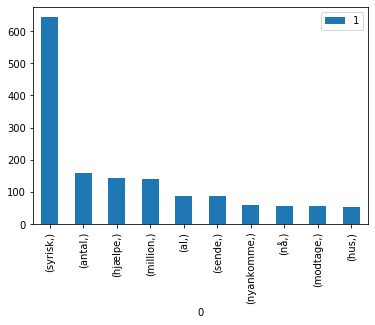

In [61]:
df_flytningmodifier[1:11].plot(kind='bar',x=0,y=1)

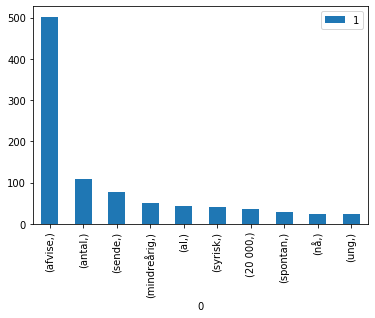

In [62]:
df_asylansøgermodifier[1:11].plot(kind='bar',x=0,y=1)

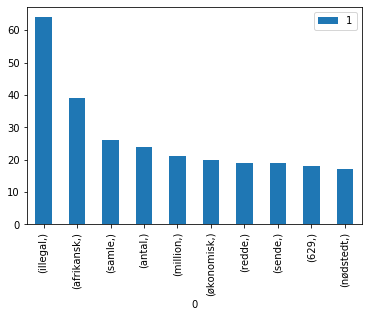

In [63]:
df_migrantmodifier[1:11].plot(kind='bar',x=0,y=1)

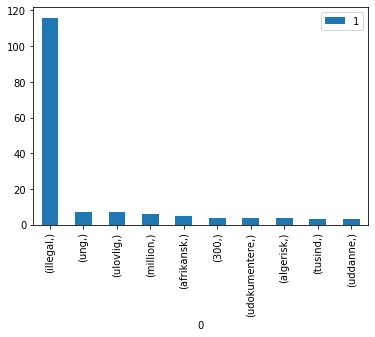

In [64]:
df_immigrantmodifier[1:11].plot(kind='bar',x=0,y=1)

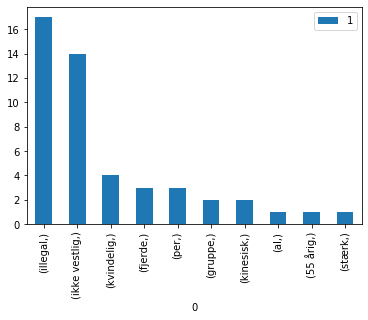

In [65]:
df_indvandremodifier[1:11].plot(kind='bar',x=0,y=1)

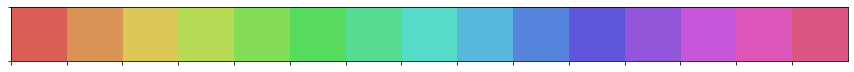

In [66]:
sns.palplot(sns.color_palette("hls", 15))


In [67]:
sns.set_color_codes("pastel")

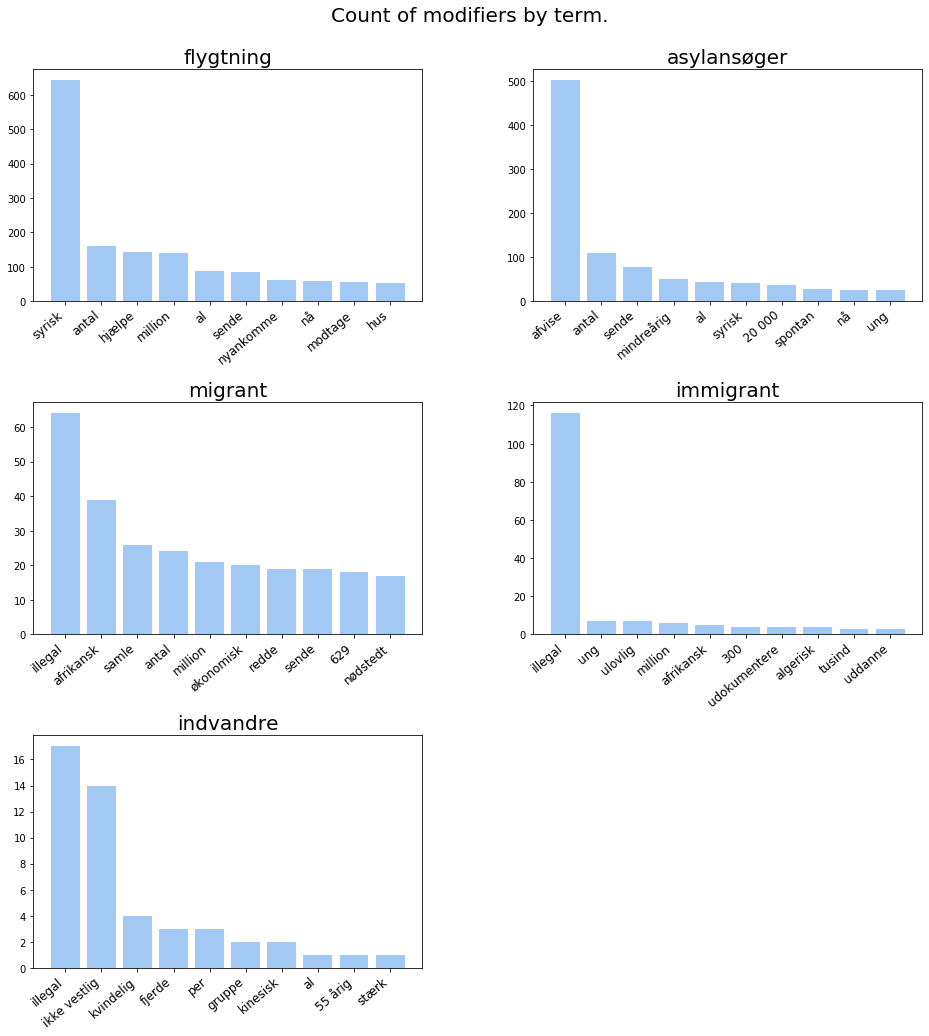

In [79]:
lst = [df_flytningmodifier[1:11], df_asylansøgermodifier[1:11], df_immigrantmodifier[1:11], df_migrantmodifier[1:11], df_indvandremodifier[1:11]]
fig, axis = plt.subplots(3,2, figsize = (15,15))
plt.tight_layout(pad=8)
fig.suptitle('Count of modifiers by term.', fontsize = 20)
for ax, term in zip(axis.flatten(), df_allmodifiers['Term'].unique()):
    
    data = df_allmodifiers[df_allmodifiers['Term'] == term].dropna()
    
    ax.bar(data[0], data[1], color='b')
    ax.set_title(term, fontdict = {'fontsize':'20'})
    ax.set_xticklabels(data[0], fontdict = {'fontsize' : 12}, rotation = 40, horizontalalignment='right')
    #plt.text(0.5, 0.5, str((2, 3, i)),
             #fontsize=18, ha='center'
axis.flatten()[-1].axis('off')
plt.savefig('modifiers.png')